In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
import scipy.constants as const

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
#sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics_data/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [3]:
# Novec 7000 properties
name = 7000
M = 200 # g/mol
boiling_point = 273+34 # K at 1 atm 
T = np.linspace(-20,100,1000)+273
Vapor_pressure = np.exp(-3548.6/T+22.978) # pa 
critical_pressure = 2.48e6
rho = 1400 # kg/m3
latent_heat = 142 # kJ/kg (heat to convert liquid to gas at boiling point)

c = 1300 # specific heat [j/(kg K)]
k = 0.075 # Thermal conductivity [w/(m*K)]



In [4]:
# #Novec 7100
# name=7100

# # Novec 7000 properties
# M = 250 # g/mol
# boiling_point = 273+61 # K at 1 atm 
# T = np.linspace(-120,100,1000)+273
# #Vapor_pressure = 27e3 # pa 
# critical_pressure = 2.48e6
# rho = 1520 # kg/m3
# latent_heat = 152 # kJ/kg (heat to convert liquid to gas at boiling point)

# c = 1300 # specific heat [j/(kg K)]
# k = 0.075 # Thermal conductivity [w/(m*K)]


In [5]:
V = 0.525e-3
R = 8.314

In [6]:


#n_plot

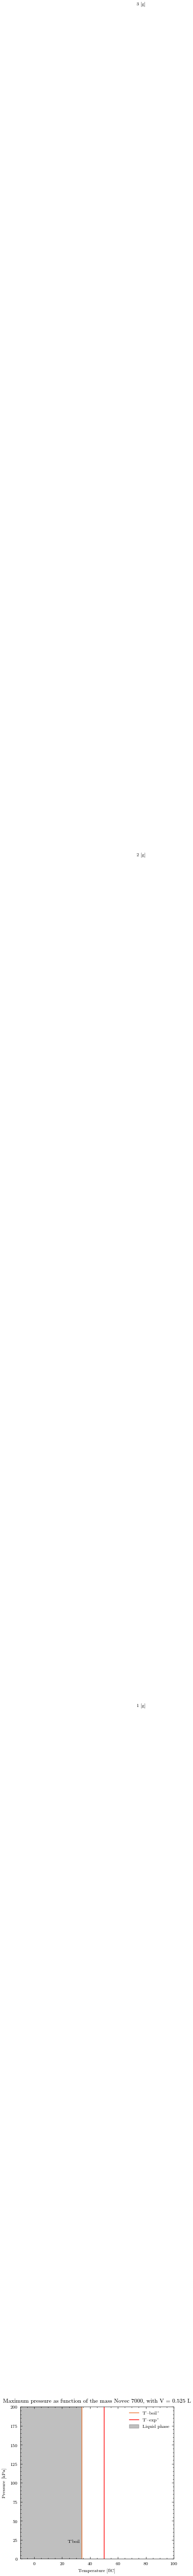

In [7]:
m_plot = [1, 2, 3]
M = 5  # Assuming M is defined, need its value to compute n_plot
n_plot = np.divide(m_plot, M)

P_mass = []
for i in range(len(n_plot)):
    pressure = n_plot[i] * R * T / V
    P_mass.append(pressure)

plt.figure(figsize=(4, 4))
x_label_pos = 80
for ii in range(len(P_mass)):
    idx = (np.abs(T - (x_label_pos + 273.15))).argmin()
    y_label_pos = P_mass[ii][idx] / 1000

    plt.plot(T - 273.15, P_mass[ii] / 1000, linestyle='--')
    plt.text(x_label_pos, y_label_pos, f'{m_plot[ii]} [g]', 
             verticalalignment='bottom', horizontalalignment='right')

plt.axvline(boiling_point - 273.15, label='T_{boil}')
plt.axvline(50, label='T_{exp}', color = 'r')
plt.text(boiling_point - 273.15 - 1, 20, 'T_boil', verticalalignment='bottom', horizontalalignment='right')
#plt.axvspan(-10 + 273.15, boiling_point, color='grey', alpha=0.5, label='Liquid phase')
plt.axvspan(-10,boiling_point-273,color='grey',alpha=0.5,label='Liquid phase')

plt.xlim(-10, 100)
plt.ylim(0, 200)
plt.legend()
plt.ylabel('Pressure [kPa]')
plt.xlabel('Temperature [°C]')
plt.title(f'Maximum pressure as function of the mass Novec {name}, with V = {V*1000} L')
plt.show()



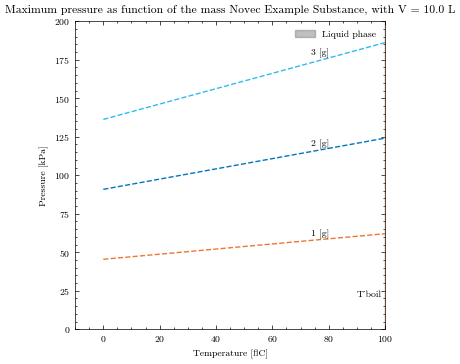

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example values for the undefined variables (replace with your actual data)
R = 8.314  # Ideal gas constant in J/(mol*K)
T = np.linspace(0, 100, 500) + 273.15  # Temperature range from 0 to 100°C, converted to Kelvin
V = 0.01  # Volume in cubic meters (m^3)
boiling_point = 100 + 273.15  # Boiling point of water in Kelvin (example)
name = "Example Substance"

m_plot = [1, 2, 3]
M = 5  # Assuming M is defined, need its value to compute n_plot
n_plot = np.divide(m_plot, M)

P_mass = []
for i in range(len(n_plot)):
    pressure = n_plot[i] * R * T / V
    P_mass.append(pressure)

plt.figure(figsize=(4, 4))
x_label_pos = 80
for ii in range(len(P_mass)):
    idx = (np.abs(T - (x_label_pos + 273.15))).argmin()
    y_label_pos = P_mass[ii][idx] / 1000

    plt.plot(T - 273.15, P_mass[ii] / 1000, linestyle='--')
    plt.text(x_label_pos, y_label_pos, f'{m_plot[ii]} [g]', 
             verticalalignment='bottom', horizontalalignment='right')

plt.axvline(boiling_point - 273.15)
plt.text(boiling_point - 273.15 - 1, 20, 'T_boil', verticalalignment='bottom', horizontalalignment='right')
plt.axvspan(-10 + 273.15, boiling_point, color='grey', alpha=0.5, label='Liquid phase')

plt.xlim(-10, 100)
plt.ylim(0, 200)
plt.legend()
plt.ylabel('Pressure [kPa]')
plt.xlabel('Temperature [°C]')
plt.title(f'Maximum pressure as function of the mass Novec {name}, with V = {V*1000} L')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (500,) and (1000,)

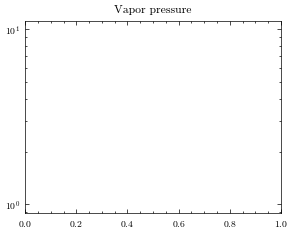

In [9]:
plt.title('Vapor pressure')
plt.semilogy(T-273,Vapor_pressure,label='$P_{vapor}$')
plt.xlabel('Vapor pressure [$pa$]')

plt.xlabel('Temperature [$^\circ C$]')
plt.legend()

In [10]:
V = 1.5e-3
P = np.linspace(0.1,1,100)*1e5
P_amb = 1e5
T = 303 # K
R = 8.314


n = (P+P_amb)*V/(R*T)
m = n*M
V_liquid = m*rho/1000
#print('Mass needed to reach', P/1000, '[kPa] is', m, '[g]')

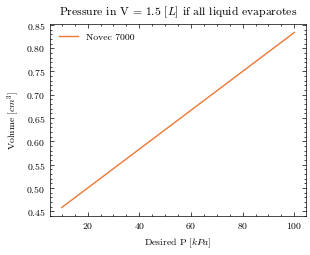

In [11]:
plt.plot(P/1000,V_liquid,label='Novec 7000')
plt.title(f"Pressure in V = {V*1000} [$L$] if all liquid evaparotes")
plt.xlabel('Desired P [$kPa$]')
plt.ylabel('Volume [$cm^3$]')
plt.legend()

C:\Users\Olivi\AppData\Local\Temp\ipykernel_5808\3187056067.py:8: RuntimeWarning: divide by zero encountered in divide
  V  = w**3*((h/(np.pi*w)-0.142*(1-10**(-h/w))))
C:\Users\Olivi\AppData\Local\Temp\ipykernel_5808\3187056067.py:8: RuntimeWarning: invalid value encountered in multiply
  V  = w**3*((h/(np.pi*w)-0.142*(1-10**(-h/w))))


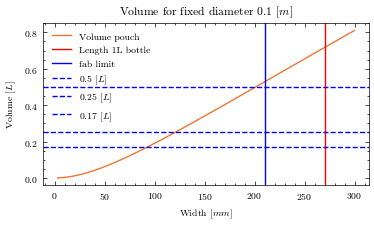

In [16]:
## Teabag problem 
# https://en.wikipedia.org/wiki/Paper_bag_problem
# Dimensions bottel = 27 * 7.5 cm (LxD)

w = np.linspace(0,300,100)*1e-3
h = 0.1 # m

V  = w**3*((h/(np.pi*w)-0.142*(1-10**(-h/w))))
cm = 1/2.54
w_plot = 10.7*cm
plt.figure(figsize=(w_plot,w_plot/2))
plt.plot(w*1000,V*1000, label='Volume pouch')
plt.title(f'Volume for fixed diameter {h} [$m$]')
plt.ylabel('Volume [$L$]')
plt.xlabel('Width [$mm$]')
plt.axvline(270, label = 'Length 1L bottle ', color='red')
plt.axvline(210, label = 'fab limit', color='blue')
plt.axhline(0.5, label = '0.5 [$L$]', color='blue', linestyle='--')
plt.axhline(0.25, label = '0.25 [$L$]', color='blue', linestyle='--')
plt.axhline(0.17, label = '0.17 [$L$]', color='blue', linestyle='--')
plt.legend()


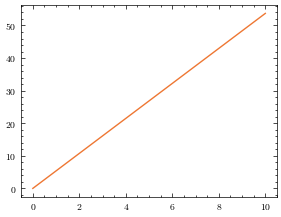

In [13]:
m = np.linspace(0,10,100)
n = m/M
P_amb = 1e5
T_oven = 50+273
V= n*R*T_oven/P_amb

plt.plot(m,V*1000)

In [14]:
# Ideal amount of liquid 
V = 0.5e-3 #L 
P_desired = 50e3 # Pa
T_oven = 50+273 # K
R = const.R
M = 200 # g/mol

n = P_desired*V/(R*T_oven)
m = n*M
m

1.8618011616864198